In [10]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
train_data = pd.read_csv("data/astro_train.csv")
test_data = pd.read_csv("data/astro_test.csv")

In [12]:
train_data = train_data.rename(columns={'class':'cla'})

In [13]:
# TRAIN
col_drop = ['id','skyVersion','run','rerun','camCol','field']
X = train_data.drop(columns=col_drop)
# FINAL TEST
test_data = test_data.drop(columns=col_drop)
# COLUMNS
t_col = list(X.columns)
t_col.remove('cla')
out_c = ['cla']

In [14]:
# Training Data set
tensor_train_data = np.stack([X[col].values for col in t_col], 1)
tensor_train_data = torch.tensor(tensor_train_data, dtype=torch.float)
# Training Labels
tensor_out_data = torch.tensor(X[out_c].values).flatten()

In [15]:
tensor_train_data

tensor([[ 15.1459,  14.9723,  18.6394,  ...,   2.6499, 236.2208,  -0.5879],
        [ 17.3579,  17.3498,  18.5273,  ...,   2.6344, 236.2213,  -0.4632],
        [ 20.6154,  19.7785,  25.4019,  ...,   1.6574, 236.2206,  -0.4643],
        ...,
        [ 24.2881,  22.8174,  25.5079,  ...,   2.0821, 210.1392,  -0.7603],
        [ 21.7467,  24.8876,  21.7797,  ...,   1.1306, 210.1402,  -0.6697],
        [ 20.8911,  20.8253,  23.3239,  ...,   2.0764, 210.1407,  -0.7163]])

In [19]:
print(tensor_train_data.shape)

torch.Size([45000, 15])


In [20]:
# Divide to 20%
total_r = 45000
test_r = int(total_r * .1)
# Spliting for validation
tensor_train_data_train = tensor_train_data[: total_r - test_r ]
tensor_train_data_test = tensor_train_data[total_r - test_r : total_r]
# Spliting outputs for validation
tensor_out_data_train = tensor_out_data[: total_r - test_r ]
tensor_out_data_test = tensor_out_data[total_r - test_r : total_r]

In [21]:
class Model(nn.Module):
    def __init__(self, num_cols, output_size, layers, p=0.4):
        super().__init__()
        self.batch_norm_num = nn.BatchNorm1d(num_cols)
        
        all_layers = []
        input_size = num_cols
        
        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i
            
        all_layers.append(nn.Linear(layers[-1], output_size))
        
        self.layers = nn.Sequential(*all_layers)
        
    def forward(self, x_d):
        x_d = self.batch_norm_num(x_d)
        x = self.layers(x_d)
        return x

In [24]:
model = Model(tensor_train_data.shape[1], 3, [600,500,400,300,200,100,50], p=0.4)

In [25]:
print(model)

Model(
  (batch_norm_num): BatchNorm1d(15, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=15, out_features=600, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(600, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=600, out_features=500, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=500, out_features=400, bias=True)
    (9): ReLU(inplace=True)
    (10): BatchNorm1d(400, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4, inplace=False)
    (12): Linear(in_features=400, out_features=300, bias=True)
    (13): ReLU(inplace=True)
    (14): BatchNorm1d(300, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (15): Dropout(p=0.4, inp

In [26]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [27]:
epochs = 
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(tensor_train_data_train)
    single_loss = loss_function(y_pred, tensor_out_data_train)
    aggregated_losses.append(single_loss)
    
    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')
        
    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()
print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

epoch:   1 loss: 1.23747671
epoch:  26 loss: 0.85966456
epoch:  51 loss: 0.81120408
epoch:  76 loss: 0.78252912
epoch: 101 loss: 0.77218449
epoch: 126 loss: 0.76064229
epoch: 151 loss: 0.75218183
epoch: 176 loss: 0.74471015
epoch: 201 loss: 0.73516148
epoch: 226 loss: 0.73277003
epoch: 251 loss: 0.72693086
epoch: 276 loss: 0.72299892
epoch: 301 loss: 0.71721399
epoch: 326 loss: 0.71115386
epoch: 351 loss: 0.70821762
epoch: 376 loss: 0.70273292
epoch: 401 loss: 0.69998914
epoch: 426 loss: 0.69725597
epoch: 451 loss: 0.69446003
epoch: 476 loss: 0.68801492
epoch: 501 loss: 0.68481094
epoch: 526 loss: 0.68074757
epoch: 551 loss: 0.67710358
epoch: 576 loss: 0.67410433
epoch: 601 loss: 0.66832364
epoch: 626 loss: 0.66379398
epoch: 651 loss: 0.65793830
epoch: 676 loss: 0.65557426
epoch: 701 loss: 0.65231174
epoch: 726 loss: 0.64371377
epoch: 751 loss: 0.63757324
epoch: 776 loss: 0.63889974
epoch: 801 loss: 0.63239866
epoch: 826 loss: 0.63111418
epoch: 851 loss: 0.62885261
epoch: 876 loss: 0.6

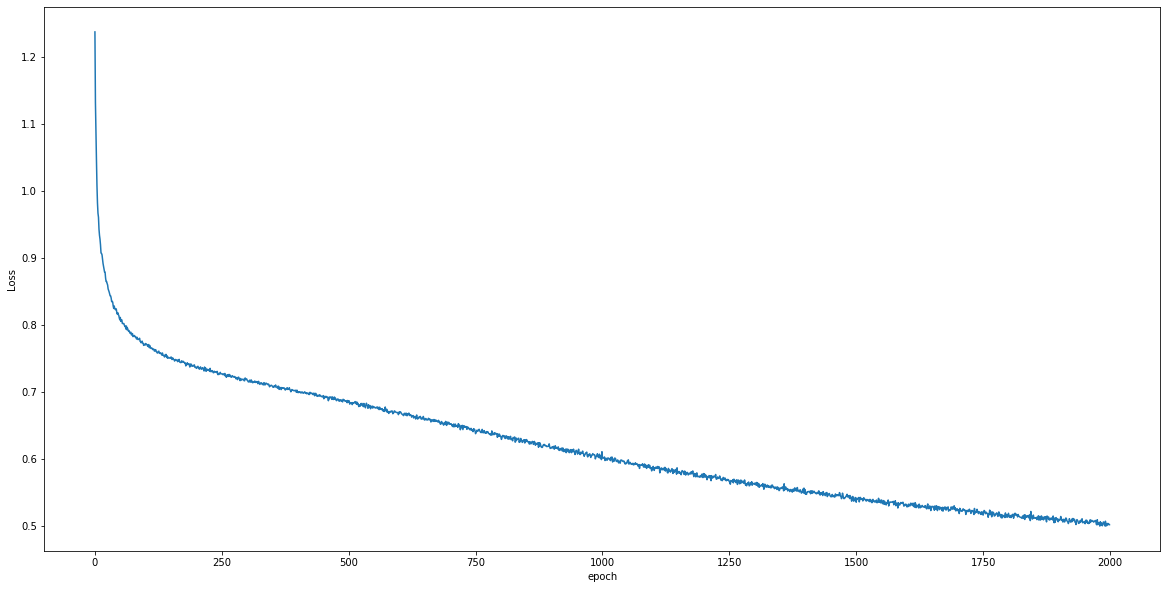

In [28]:
plt.figure(figsize=(20,10))
plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

In [82]:
with torch.no_grad():
    y_val = model(tensor_train_data_test)
    loss = loss_function(y_val, tensor_out_data_test)
print(f'loss: {loss:.8f}')
print(y_val)

loss: 1.66123605
tensor([[ 3.5517, -3.0609, -0.2216],
        [ 3.6966, -3.5663,  0.1188],
        [ 0.2569, -0.4788,  0.5258],
        ...,
        [ 1.0412, -0.8910,  0.0519],
        [-3.0985,  3.1607, -0.0970],
        [ 0.7477, -0.6301,  0.7069]])


In [83]:
y_val = np.argmax(y_val, axis=1)
print(y_val)

tensor([0, 0, 2,  ..., 0, 1, 0])


In [84]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(tensor_out_data_test,y_val))
print(classification_report(tensor_out_data_test,y_val))
print(accuracy_score(tensor_out_data_test, y_val))

[[1135  228  391]
 [ 364  609  560]
 [ 466  249  498]]
              precision    recall  f1-score   support

           0       0.58      0.65      0.61      1754
           1       0.56      0.40      0.47      1533
           2       0.34      0.41      0.37      1213

    accuracy                           0.50      4500
   macro avg       0.49      0.48      0.48      4500
weighted avg       0.51      0.50      0.50      4500

0.49822222222222223


In [85]:
print(tensor_out_data_test)

tensor([0, 0, 0,  ..., 0, 2, 2])
